In [255]:
import pandas as pd
import missingno
import matplotlib.pyplot as plt
import seaborn as sns

In [256]:
# Loading the data into our df variable using pandas
df = pd.read_csv("Titanic.csv")

# Display the first 5 rows of the dataset
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [257]:
# Display basic info about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [258]:
# Count the missing values in each column
missing_values = df.isnull().sum()
missing_values

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<AxesSubplot:>

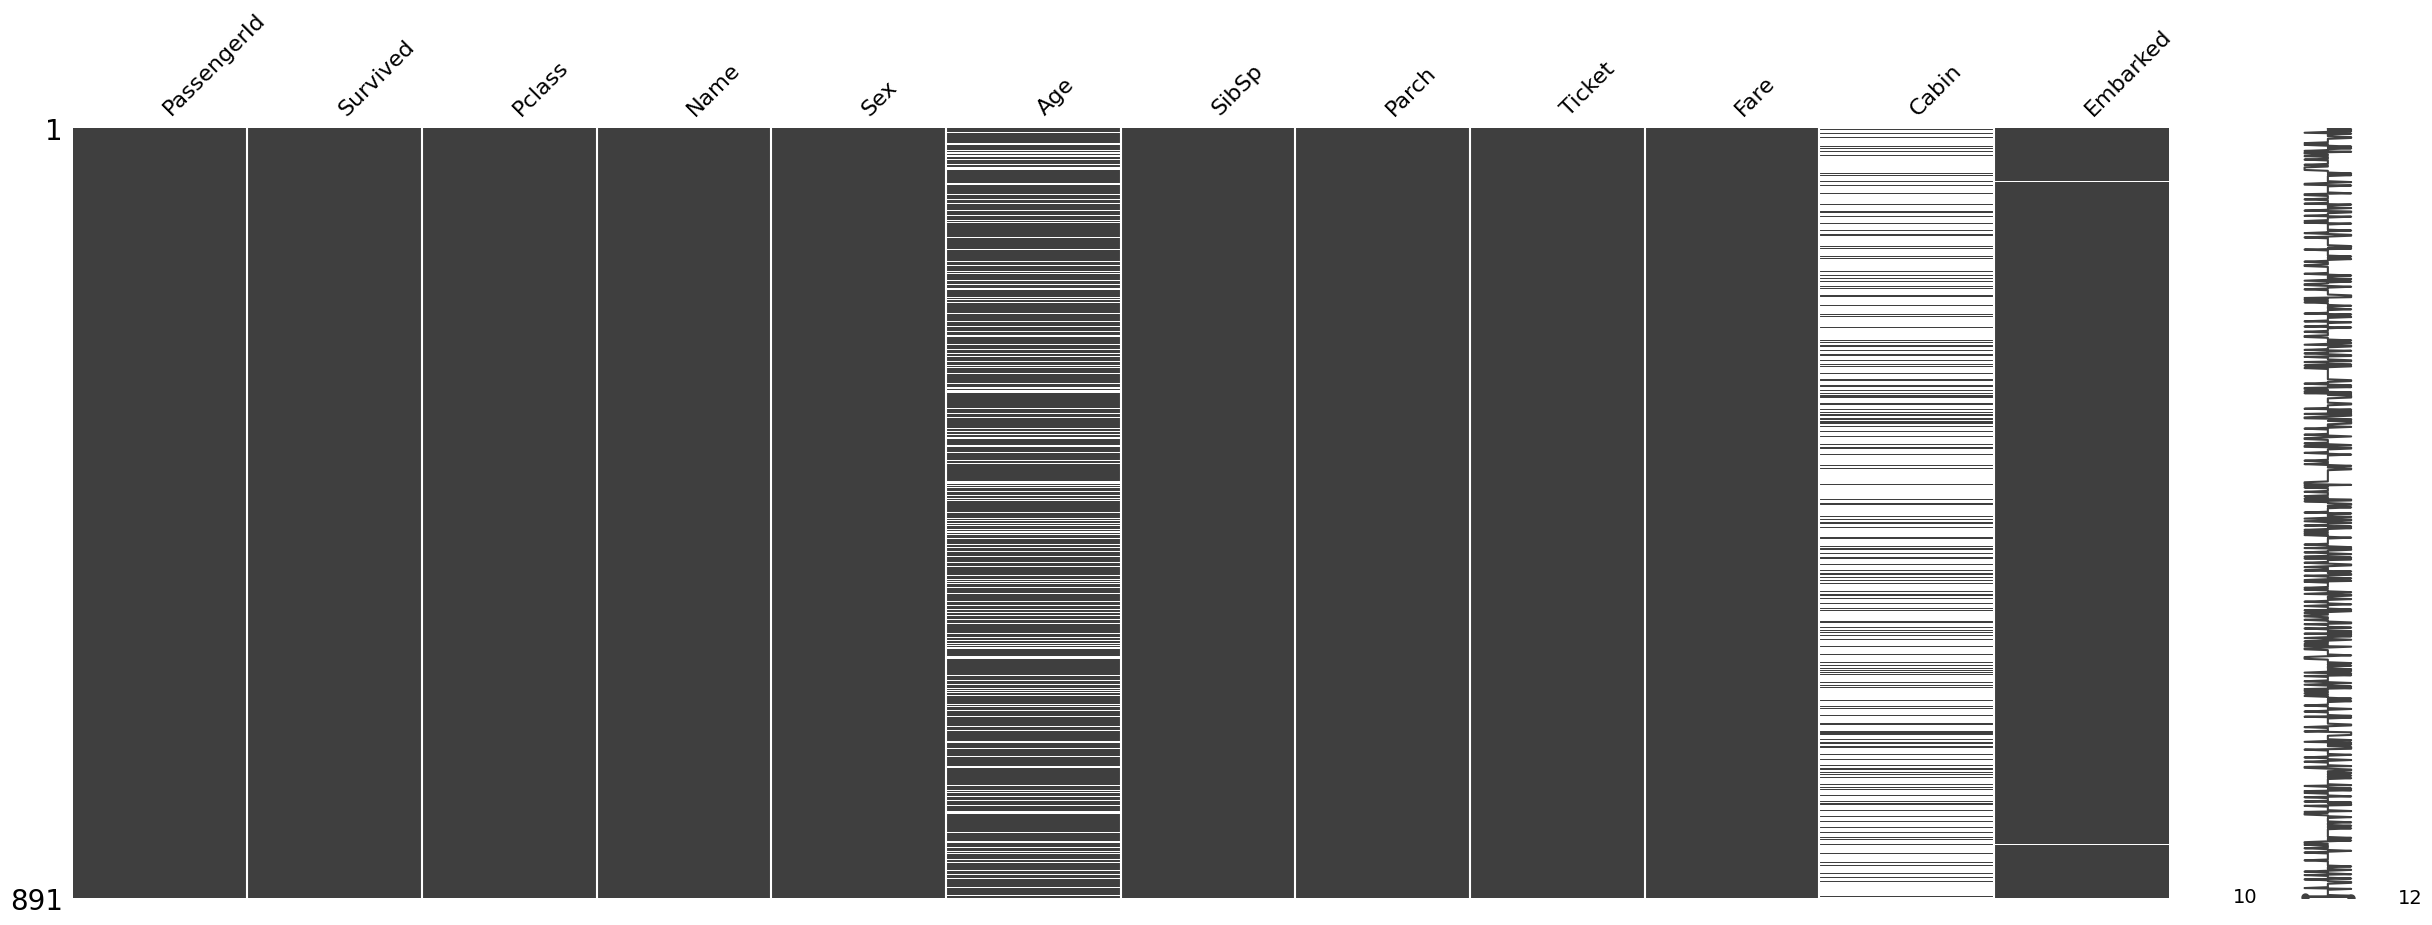

In [259]:
# Visualize missing values
missingno.matrix(df, figsize = (30,10))

In [260]:
# Drop the 'Cabin' column from the DataFrame
df.drop("Cabin", axis = 1, inplace = True)

# Drop rows with missing values in the 'Embarked' column
df.dropna(subset = ["Embarked"], inplace = True)

# Fill missing values in the 'Age' column with the median age
df['Age'].fillna(df['Age'].median(), inplace=True)

C:\Users\glovers\AppData\Local\Temp\ipykernel_6356\1538348668.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)


**Task nr1:**
***In the movie, the upper-class were given preference on lifeboats. Does this show in the data?***

**Answer: Yes it does! Based on the data below we can see that we have significant difference when it comes to how many people survived from each class**

Class 1: 134/214 survived
Class 2: 87/184 survived
Class 3: 119/491 survived


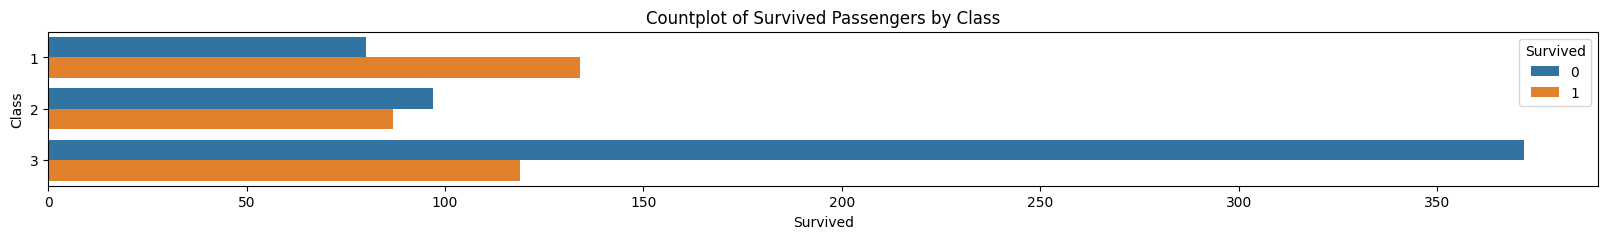

In [261]:
# Group the DataFrame by "Pclass" and calculate the sum and count of "Survived" for each group
class_survival = df.groupby('Pclass')['Survived'].agg(['sum', 'count'])

# Iterate through each group and print the survival statistics
for pclass, stats in class_survival.iterrows():
    print(f"Class {pclass}: {stats['sum']}/{stats['count']} survived")

# Set the figure size for the plot
plt.figure(figsize = (20, 2))

# Create a countplot of Survived passengers by Pclass
sns.countplot(y = "Pclass", hue = "Survived", data = df)

# Set title and axis labels
plt.title('Countplot of Survived Passengers by Class')
plt.xlabel('Survived')
plt.ylabel('Class')

# Add legend
plt.legend(title= "Survived")

# Display plot
plt.show()

***Task nr2:***
***"Women and children first". Was this the case?***

***Answer: Yes it was the case. Based on the Total survivors vs Total count of all categories we have more Childrens and Womens survivors then Male survivors***

Survival Statistics by Category:
Children: 61/113 survived
Adult Females: 193/257 survived
Adult Males: 86/519 survived


C:\Users\glovers\PycharmProjects\pythonProject\venv\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\glovers\PycharmProjects\pythonProject\venv\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


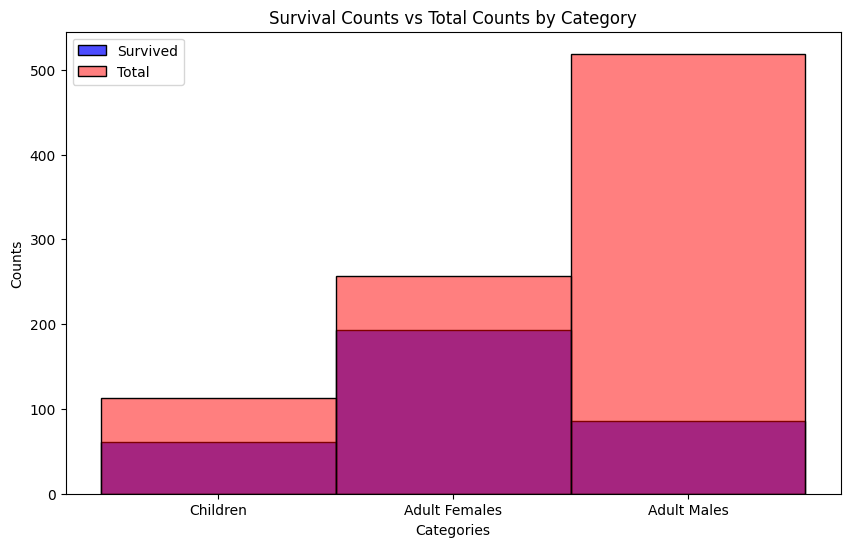

In [262]:
# Filter passengers into three categories: children, adult females, and adult males
children_survived = df.loc[df["Age"] < 18]["Survived"]
adult_female_survived = df[(df["Age"] >= 18) & (df["Sex"] == "female")]["Survived"]
adult_male_survived = df[(df["Age"] >= 18) & (df["Sex"] == "male")]["Survived"]

# Calculate the sum and count of survivors in each category
children_sum = children_survived.sum()
children_count = children_survived.count()

adult_female_sum = adult_female_survived.sum()
adult_female_count = adult_female_survived.count()

adult_male_sum = adult_male_survived.sum()
adult_male_count = adult_male_survived.count()

# Print the results
print("Survival Statistics by Category:")
print(f"Children: {children_sum}/{children_count} survived")
print(f"Adult Females: {adult_female_sum}/{adult_female_count} survived")
print(f"Adult Males: {adult_male_sum}/{adult_male_count} survived")

# Define the categories and their corresponding survival/total counts
categories = ["Children", "Adult Females", "Adult Males"]
survival_counts = [children_sum, adult_female_sum, adult_male_sum]
total_counts = [children_count, adult_female_count, adult_male_count]

# Create a DataFrame for plotting
data = {'Category': categories, 'Survival Counts': survival_counts, 'Total Counts': total_counts}
df_plot = pd.DataFrame(data)

plt.figure(figsize=(10, 6))  # Set the figure size
sns.histplot(data=df_plot, x='Category', weights='Survival Counts', bins=len(categories), alpha=0.7, color = "blue", label='Survived')
sns.histplot(data=df_plot, x='Category', weights='Total Counts', bins=len(categories), alpha=0.5, color = "red", label='Total')

# Add labels,Title and Legend
plt.xlabel('Categories') 
plt.ylabel('Counts') 
plt.title('Survival Counts vs Total Counts by Category') 
plt.legend()

# Display the plot
plt.show()

***Task 4: Add one other observation that you have noted in the dataset***

***Answer: I have noticed that Small families tended to have a higher survival rate***

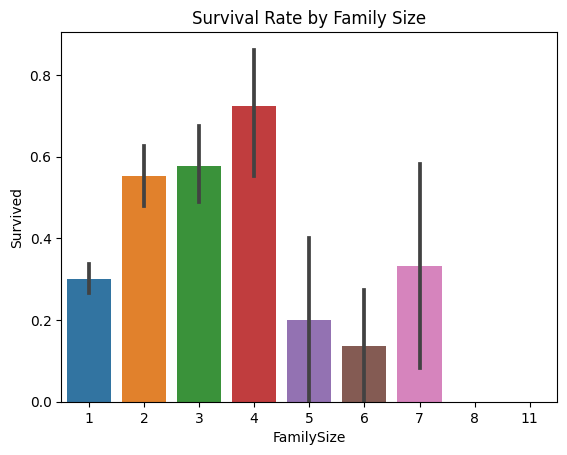

In [263]:
# Create a new column 'FamilySize' by combining 'SibSp' and 'Parch'
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1  # Adding 1 for the passenger themselves

# Survival rate by FamilySize
sns.barplot(x='FamilySize', y='Survived', data=df)
plt.title('Survival Rate by Family Size')
plt.show()

***Task 3: What is the most important factor in determining survival of the Titanic incident?***

***Answer: We have quite a few important factors that determines survival*** 

***Gender: Women had higher survival rate compare to men***

***Passenger Class: Higher-class passenger had better survival rates***

***Family Size: Small families tended to have higher survival rates***